In [2]:
import csv
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import requests
import json
import numpy as np
from pandas import DataFrame
from pprint import pprint
from api_keys import api_key
print(api_key)
import requests
r = requests.get('https://api.mysportsfeeds.com/v2.0/pull/nba/injuries.json', auth=(api_key, 'MYSPORTSFEEDS'))
pprint(r.text)

ab67bd90-b746-48d1-9ac8-673c6a
('{"lastUpdatedOn":"2019-01-08T12:25:28.768Z","players":[{"id":10138,"firstName":"Alex","lastName":"Abrines","primaryPosition":"SG","jerseyNumber":8,"currentTeam":{"id":96,"abbreviation":"OKL"},"currentRosterStatus":"ROSTER","currentInjury":{"description":"personal","playingProbability":"OUT"},"height":"6\'6\\"","weight":190,"birthDate":"1993-08-01","age":25,"birthCity":"Palma '
 'de '
 'Mallorca","birthCountry":"Spain","rookie":false,"highSchool":null,"college":null,"handedness":{"shoots":"R"},"officialImageSrc":null,"socialMediaAccounts":[]},{"id":15218,"firstName":"Grayson","lastName":"Allen","primaryPosition":"SG","jerseyNumber":24,"currentTeam":{"id":98,"abbreviation":"UTA"},"currentRosterStatus":"ROSTER","currentInjury":{"description":"sprained '
 'right '
 'ankle","playingProbability":"OUT"},"height":"6\'5\\"","weight":198,"birthDate":"1995-10-07","age":23,"birthCity":"Jacksonville, '
 'FL","birthCountry":"USA","rookie":true,"highSchool":null,"coll

In [4]:
data = r.json()
data_playerinfo = data['players']
data_playerinfo

[{'id': 10138,
  'firstName': 'Alex',
  'lastName': 'Abrines',
  'primaryPosition': 'SG',
  'jerseyNumber': 8,
  'currentTeam': {'id': 96, 'abbreviation': 'OKL'},
  'currentRosterStatus': 'ROSTER',
  'currentInjury': {'description': 'personal', 'playingProbability': 'OUT'},
  'height': '6\'6"',
  'weight': 190,
  'birthDate': '1993-08-01',
  'age': 25,
  'birthCity': 'Palma de Mallorca',
  'birthCountry': 'Spain',
  'rookie': False,
  'highSchool': None,
  'college': None,
  'handedness': {'shoots': 'R'},
  'officialImageSrc': None,
  'socialMediaAccounts': []},
 {'id': 15218,
  'firstName': 'Grayson',
  'lastName': 'Allen',
  'primaryPosition': 'SG',
  'jerseyNumber': 24,
  'currentTeam': {'id': 98, 'abbreviation': 'UTA'},
  'currentRosterStatus': 'ROSTER',
  'currentInjury': {'description': 'sprained right ankle',
   'playingProbability': 'OUT'},
  'height': '6\'5"',
  'weight': 198,
  'birthDate': '1995-10-07',
  'age': 23,
  'birthCity': 'Jacksonville, FL',
  'birthCountry': 'USA',

In [5]:
df = DataFrame(data_playerinfo)
df

,age,birthCity,birthCountry,birthDate,college,currentInjury,currentRosterStatus,currentTeam,firstName,handedness,height,highSchool,id,jerseyNumber,lastName,officialImageSrc,primaryPosition,rookie,socialMediaAccounts,weight
0,25,Palma de Mallorca,Spain,1993-08-01,None,"{'description': 'personal', 'playingProbabilit...",ROSTER,"{'id': 96, 'abbreviation': 'OKL'}",Alex,{'shoots': 'R'},"6'6""",None,10138,8.0,Abrines,None,SG,False,[],190
1,23,"Jacksonville, FL",USA,1995-10-07,None,"{'description': 'sprained right ankle', 'playi...",ROSTER,"{'id': 98, 'abbreviation': 'UTA'}",Grayson,{'shoots': None},"6'5""",None,15218,24.0,Allen,None,SG,True,[],198
2,20,"San Diego, CA",USA,1998-10-16,"University of California, Los Angeles","{'description': 'sore right knee', 'playingPro...",ROSTER,"{'id': 87, 'abbreviation': 'IND'}",Ike,{'shoots': 'R'},"6'10""",Centennial,13796,13.0,Anigbogu,None,C,False,"[{'mediaType': 'TWITTER', 'value': 'IkePostrs_'}]",262
3,34,"New York, NY",USA,1984-05-27,Syracuse University,"{'description': 'unspecified', 'playingProbabi...",ROSTER,"{'id': 109, 'abbreviation': 'HOU'}",Carmelo,{'shoots': None},"6'8""",Oak Hill Academy,9369,7.0,Anthony,None,PF,False,"[{'mediaType': 'TWITTER', 'value': 'carmeloant...",240
4,19,"Tempe, AZ",USA,1999-03-12,None,"{'description': 'left knee bone bruise', 'play...",ROSTER,"{'id': 103, 'abbreviation': 'SAC'}",Marvin,{'shoots': None},"6'11""",None,15199,35.0,Bagley III,None,PF,True,[],234
5,34,Mayaguez,Puerto Rico,1984-06-26,Northeastern University,"{'description': 'sore left ankle', 'playingPro...",ROSTER,"{'id': 108, 'abbreviation': 'DAL'}",J.J.,{'shoots': 'R'},"6'0""",Miami Christian School,9180,5.0,Barea,None,SG,False,"[{'mediaType': 'TWITTER', 'value': 'jjbareapr'}]",185
6,28,"Baltimore, MD",USA,1991-01-06,University of Memphis,"{'description': 'right hip', 'playingProbabili...",ROSTER,"{'id': 99, 'abbreviation': 'DEN'}",Will,{'shoots': 'R'},"6'6""",Brewster Academy,9197,5.0,Barton,None,SG,False,"[{'mediaType': 'TWITTER', 'value': 'WillTheThr...",190
7,32,Gisborne,New Zealand,1986-12-09,Washington State University,"{'description': 'fracture in his left hand', '...",ROSTER,"{'id': 82, 'abbreviation': 'BOS'}",Aron,{'shoots': 'R'},"6'10""",None,9211,46.0,Baynes,None,C,False,[],260
8,29,"Kelford, NC",USA,1989-07-01,Old Dominion University,"{'description': 'sprained right ankle', 'playi...",ROSTER,"{'id': 91, 'abbreviation': 'ATL'}",Kent,{'shoots': 'L'},"6'5""",Bertie,9086,24.0,Bazemore,None,SG,False,"[{'mediaType': 'TWITTER', 'value': '24Bazemore'}]",201
9,24,"Walnut Creek, CA",USA,1994-07-01,University of California,"{'description': 'personal', 'playingProbabilit...",ROSTER,"{'id': 82, 'abbreviation': 'BOS'}",Jabari,{'shoots': None},"6'6""",Salesian Prep,13771,26.0,Bird,None,SG,False,[],198


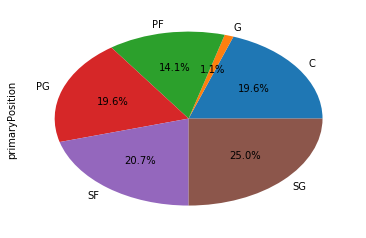

In [9]:
df.dropna(subset=["primaryPosition"])
height_group = df.groupby("primaryPosition")
count_height_group  = height_group["primaryPosition"].count()
count_height_group
count_chart1 = count_height_group.plot(kind='pie',autopct="%1.1f%%")

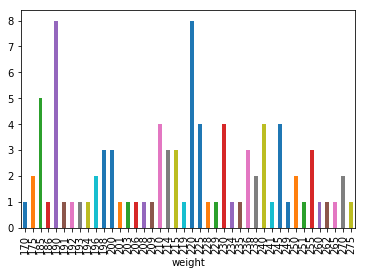

In [12]:
df.dropna(subset=["weight"])
height_group = df.groupby("weight")
count_height_group  = height_group["weight"].count()
count_height_group
count_chart1 = count_height_group.plot(kind='bar')

In [13]:
df.mean()

age                    26.706522
id                  10597.152174
jerseyNumber           16.175824
officialImageSrc             NaN
rookie                  0.119565
weight                218.673913
dtype: float64

In [14]:
df.std()

age                    4.473458
id                  2216.190167
jerseyNumber          12.963704
officialImageSrc            NaN
rookie                 0.326230
weight                25.052081
dtype: float64